In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')
import sklearn

In [5]:
df_train = pd.read_csv('229255_bus_riders_at_rush_hour_data/train.csv')

In [4]:
test = pd.read_csv('229255_bus_riders_at_rush_hour_data/test.csv')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

 2019년 9월 제주도의 각 날짜, 출근시간(6시~12시)의 버스 정류장별 승하차 인원, 퇴근시간(18시~20시)의 버스 정류장별 승차 인원

In [13]:
df_train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
df_train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


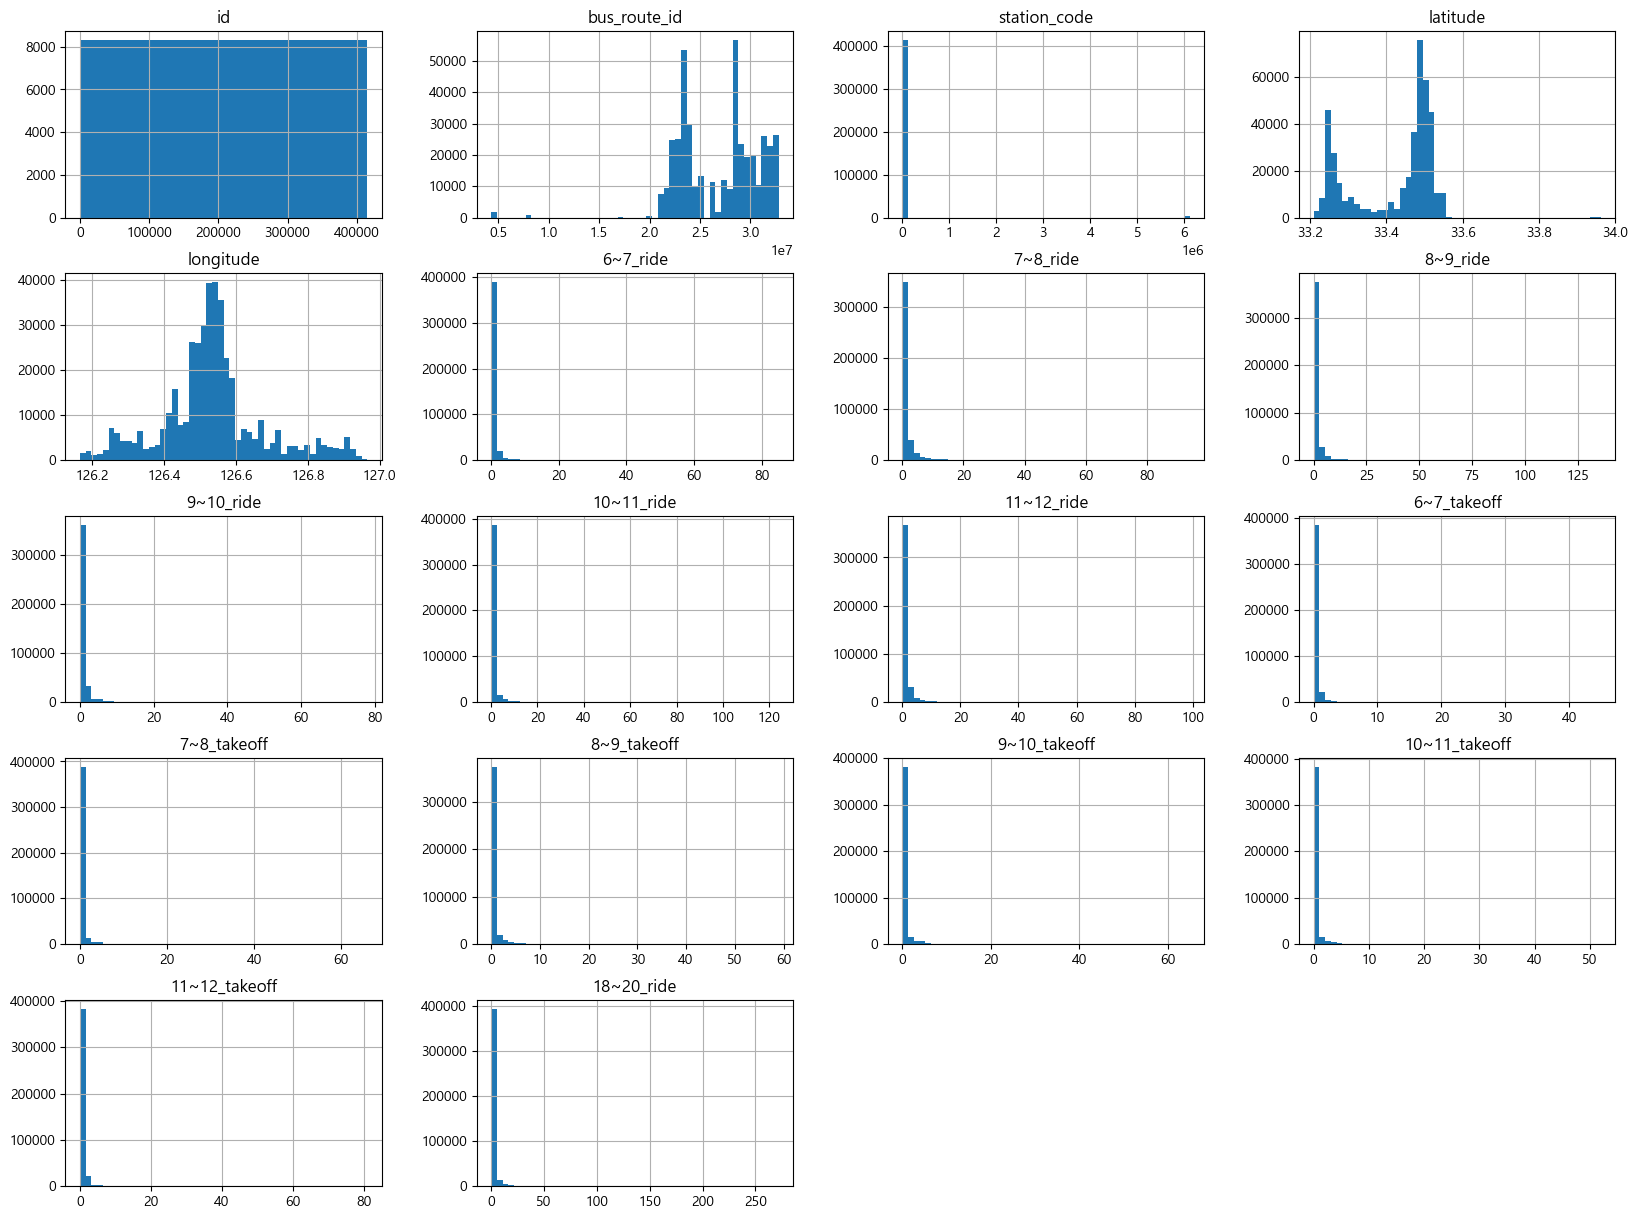

In [15]:
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
bus_bts = pd.read_csv('bus_bts.csv')

In [23]:
bus_bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


0         16.0
1         22.0
2          4.0
3         79.0
4          0.0
          ... 
415418     4.0
415419     4.0
415420     0.0
415421     1.0
415422     0.0
Length: 415423, dtype: float64 0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
415418    0.0
415419    0.0
415420    1.0
415421    0.0
415422    4.0
Length: 415423, dtype: float64


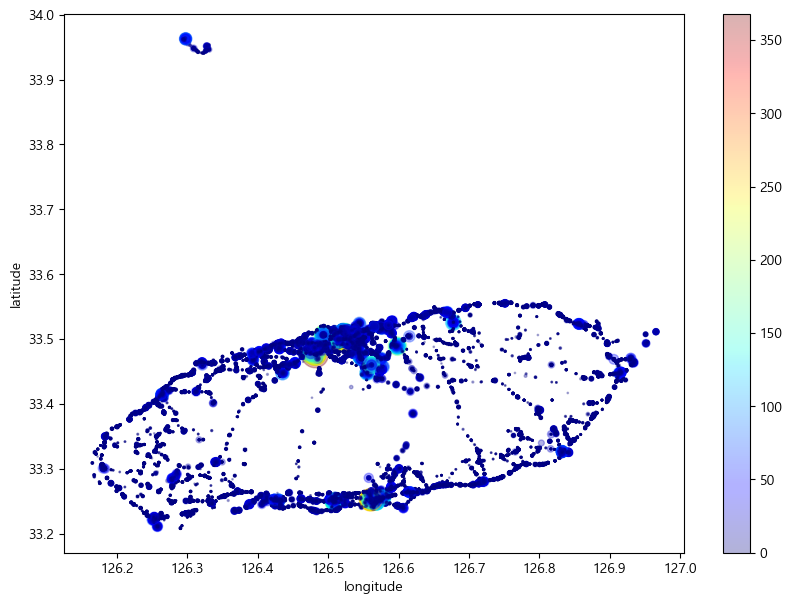

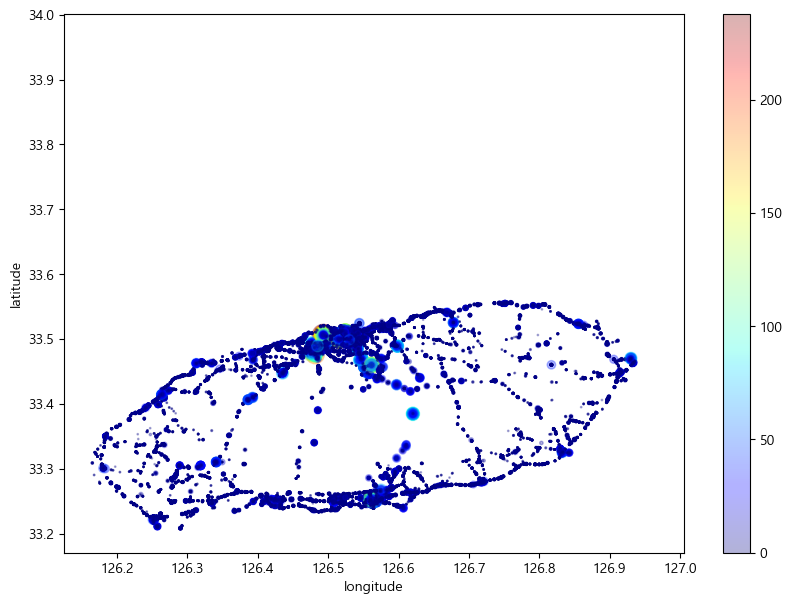

In [9]:
# 승차 인원의 합
temp_ride = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']
#하차 인원의 합
temp_takeoff = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']
print(temp_ride, temp_takeoff)

# 승차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_ride, cmap='jet', figsize=(10, 7), s=temp_ride)
plt.show()

# 하차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_takeoff, cmap='jet', figsize=(10, 7), s=temp_takeoff)
plt.show()

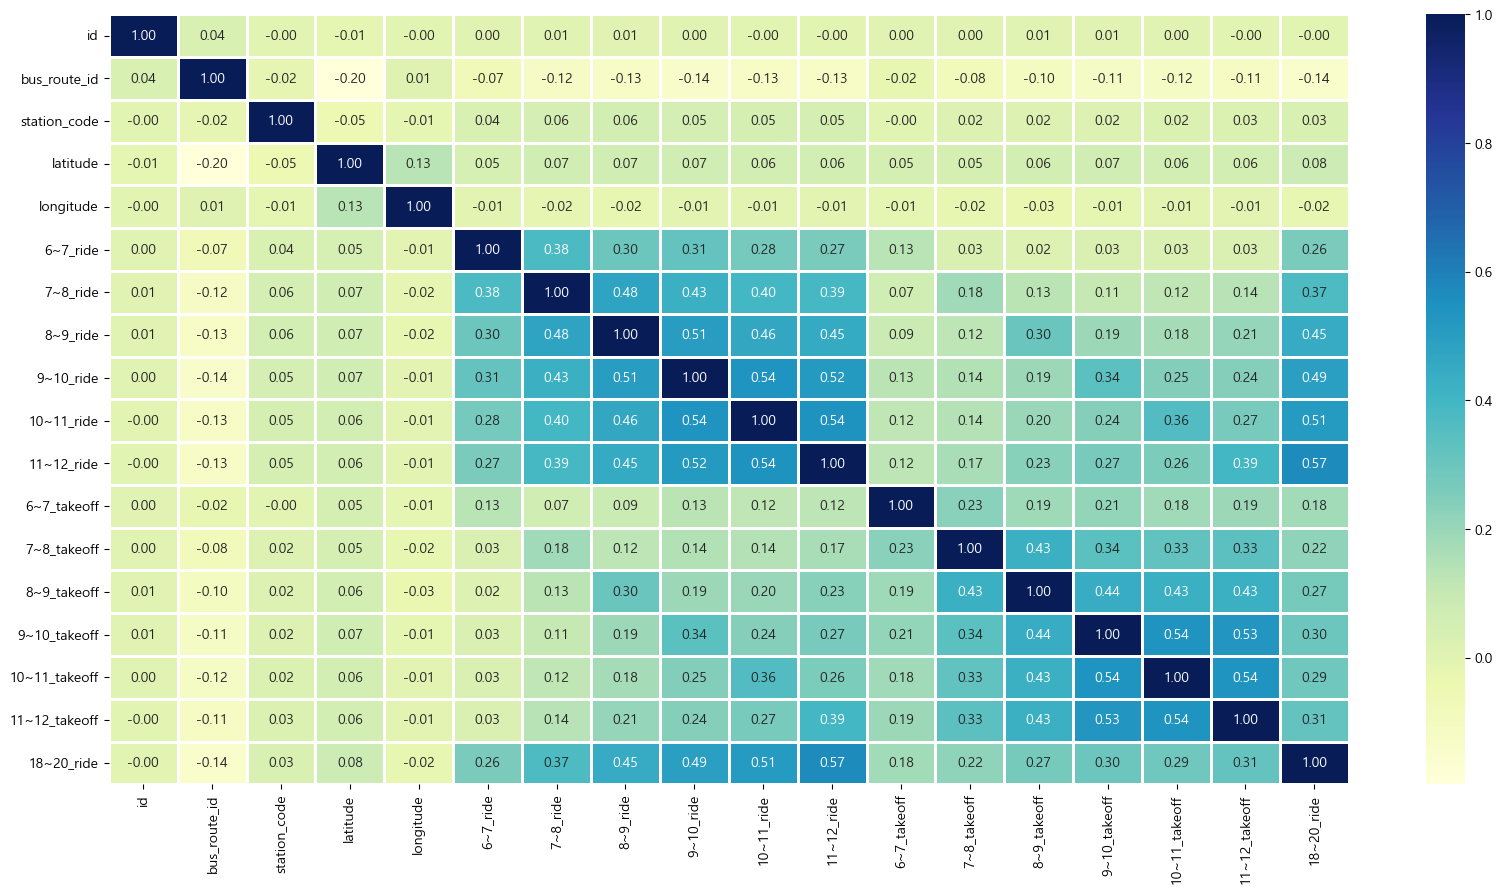

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

In [11]:
df_train['ride_sum'] = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']
df_train['takeoff_sum'] = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,ride_sum,takeoff_sum
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,79.0,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


 # 데이터 전처리

In [24]:
# 특성(X)과 레이블(y)을 분리
X_train = df_train.drop('18~20_ride', axis=1) # 특성 (X 데이터)
y_train = df_train['18~20_ride'].copy() # 레이블 (y 데이터)

In [25]:
X_train.shape, y_train.shape

((415423, 22), (415423,))

 in_out : 시내=1 , 시외=0
date만 뽑아내기
station name  : 일단 제거

- station name 제거

In [26]:
X_train.drop('station_name',axis=1, inplace=True)

In [27]:
X_train.shape

(415423, 21)

In [28]:
 inout= X_train[['in_out']]

In [29]:
pd.get_dummies(X_train['in_out'])

,시내,시외
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
415418,1,0
415419,1,0
415420,1,0
415421,1,0


In [29]:
# scikit-learn 변환기 - one hot 인코딩
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(inout)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
onehot_encoder.categories_

[array(['시내', '시외'], dtype=object)]

- 날짜

In [30]:
X_train['date2'] = pd.to_datetime(X_train['date'])

In [31]:
X_train['weekday'] = X_train['date2'].dt.weekday # 요일

In [32]:
X_train = pd.get_dummies(X_train,columns=['weekday']) 

In [33]:
# test 데이터도 똑같이 변환
test['date2'] = pd.to_datetime(test['date'])
test['weekday'] = test['date2'].dt.weekday
test = pd.get_dummies(test,columns=['weekday'])

In [34]:
del X_train['date2']
del test['date2']

- inout

In [35]:
X_train['in_out'] = X_train['in_out'].map({'시내':0,'시외':1})

In [36]:
# test데이터
test['in_out'] = test['in_out'].map({'시내':0,'시외':1})

In [37]:
X_train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,11~12_takeoff,ride_sum,takeoff_sum,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0.0,16.0,0.0,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,...,0.0,22.0,0.0,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,...,0.0,4.0,0.0,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,...,0.0,79.0,0.0,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,...,0.0,4.0,0.0,1,0,0,0,0,0,0
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,...,0.0,4.0,0.0,1,0,0,0,0,0,0
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,0
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0,0,0,0,0


In [12]:
weather = pd.read_csv('OBS_ASOS_TIM_20230314200606.csv',encoding='cp949')

In [13]:
weather

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,184,제주,2019-09-01 00:00,23.7,NaN,NaN,NaN,2.0,NaN,180.0,...,35.0,2000.0,NaN,NaN,23.1,NaN,26.3,25.7,25.2,26.9
1,184,제주,2019-09-01 01:00,23.7,NaN,NaN,NaN,2.1,NaN,180.0,...,73.0,2000.0,NaN,NaN,23.0,NaN,26.0,25.5,25.0,26.9
2,184,제주,2019-09-01 02:00,23.5,NaN,NaN,NaN,1.4,NaN,180.0,...,69.0,2000.0,NaN,NaN,22.9,NaN,25.8,25.3,24.9,26.9
3,184,제주,2019-09-01 03:00,23.4,NaN,NaN,NaN,1.1,NaN,180.0,...,10.0,2000.0,NaN,NaN,22.6,NaN,25.6,25.2,24.7,27.0
4,184,제주,2019-09-01 04:00,23.4,NaN,NaN,NaN,1.6,NaN,180.0,...,10.0,2000.0,NaN,NaN,22.6,NaN,25.5,24.9,24.5,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,189,서귀포,2019-10-31 19:00,17.4,NaN,NaN,NaN,1.3,NaN,360.0,...,NaN,2000.0,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN
5852,189,서귀포,2019-10-31 20:00,16.5,NaN,NaN,NaN,1.3,NaN,360.0,...,NaN,2000.0,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN
5853,189,서귀포,2019-10-31 21:00,16.6,NaN,NaN,NaN,1.3,NaN,360.0,...,NaN,2000.0,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN
5854,189,서귀포,2019-10-31 22:00,16.2,NaN,NaN,NaN,1.5,NaN,360.0,...,NaN,2000.0,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN


In [15]:
weather['time'] = [ int( i.split(' ')[1].split(':')[0] ) for i in weather['일시']] 
weather['일시'] = [ i.split(' ')[0] for i in weather['일시'] ] 

In [16]:
weather2 = weather[['일시', 'time', '지점명', '기온(°C)', '강수량(mm)', '풍속(m/s)']]

In [17]:
weather2

,일시,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,2019-09-01,0,제주,23.7,NaN,2.0
1,2019-09-01,1,제주,23.7,NaN,2.1
2,2019-09-01,2,제주,23.5,NaN,1.4
3,2019-09-01,3,제주,23.4,NaN,1.1
4,2019-09-01,4,제주,23.4,NaN,1.6
...,...,...,...,...,...,...
5851,2019-10-31,19,서귀포,17.4,NaN,1.3
5852,2019-10-31,20,서귀포,16.5,NaN,1.3
5853,2019-10-31,21,서귀포,16.6,NaN,1.3
5854,2019-10-31,22,서귀포,16.2,NaN,1.5


In [18]:
weather2['time'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [119]:
# 실제 측정 데이터이기 때문에, 12시 이전의 시간대만 사용
#rain2= rain2[(rain2['time']<12)]

In [19]:
# null 값 -> 0.0으로 바꾸기
weather2= weather2.fillna(0.0)

In [20]:
weather2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       5856 non-null   object 
 1   time     5856 non-null   int64  
 2   지점명      5856 non-null   object 
 3   기온(°C)   5856 non-null   float64
 4   강수량(mm)  5856 non-null   float64
 5   풍속(m/s)  5856 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 274.6+ KB


In [21]:
weather2.tail()

,일시,time,지점명,기온(°C),강수량(mm),풍속(m/s)
5851,2019-10-31,19,서귀포,17.4,0.0,1.3
5852,2019-10-31,20,서귀포,16.5,0.0,1.3
5853,2019-10-31,21,서귀포,16.6,0.0,1.3
5854,2019-10-31,22,서귀포,16.2,0.0,1.5
5855,2019-10-31,23,서귀포,15.7,0.0,1.7


In [22]:
weather2 = weather2.rename(columns={'일시':'date'})

In [38]:
train2 = pd.merge(X_train, weather2, how='left',on=['date'])
test2 = pd.merge(test, weather2, how='left',on=['date'])

In [39]:
train2

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0,0,0,0,1,0,제주,23.7,0.0,2.0
1,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0,0,0,0,1,1,제주,23.7,0.0,2.1
2,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0,0,0,0,1,2,제주,23.5,0.0,1.4
3,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0,0,0,0,1,3,제주,23.4,0.0,1.1
4,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0,0,0,0,1,4,제주,23.4,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39880603,415422,2019-09-30,32820000,0,6115100,33.24873,126.50799,0.0,0.0,0.0,...,0,0,0,0,0,19,서귀포,24.5,2.5,1.2
39880604,415422,2019-09-30,32820000,0,6115100,33.24873,126.50799,0.0,0.0,0.0,...,0,0,0,0,0,20,서귀포,24.4,0.2,0.7
39880605,415422,2019-09-30,32820000,0,6115100,33.24873,126.50799,0.0,0.0,0.0,...,0,0,0,0,0,21,서귀포,24.7,0.0,1.0
39880606,415422,2019-09-30,32820000,0,6115100,33.24873,126.50799,0.0,0.0,0.0,...,0,0,0,0,0,22,서귀포,24.6,1.9,0.9
